### [NASA API](https://api.nasa.gov/)

Napisz program w Pythonie, który pobierze zdjęcie astronomiczne dnia z API NASA APOD (Astronomy Picture of the Day). Program powinien:

1. Umożliwić użytkownikowi podanie daty.
2. Wysłać żądanie GET do API NASA APOD z JSON-em zawierającym datę.
3. Otrzymać odpowiedź z API w formacie JSON.
4. Wyświetlić tytuł, opis oraz zdjęcie astronomiczne dnia.

Podaj datę w formacie RRRR-MM-DD (np. 2024-05-31):  2024-05-22


{'copyright': '\nGöran Strand\n', 'date': '2024-05-22', 'explanation': "It was bright and green and stretched across the sky. This striking aurora display was captured in 2016 just outside of Östersund, Sweden. Six photographic fields were merged to create the featured panorama spanning almost 180 degrees.  Particularly striking aspects of this aurora include its sweeping arc-like shape and its stark definition.  Lake Storsjön is seen in the foreground, while several familiar constellations and the star Polaris are visible through the aurora, far in the background.  Coincidently, the aurora appears to avoid the Moon visible on the lower left.  The aurora appeared a day after a large hole opened in the Sun's corona, allowing particularly energetic particles to flow out into the Solar System.  The green color of the aurora is caused by oxygen atoms recombining with ambient electrons high in the Earth's atmosphere.   Your Sky Surprise: What picture did APOD feature on your birthday? (post

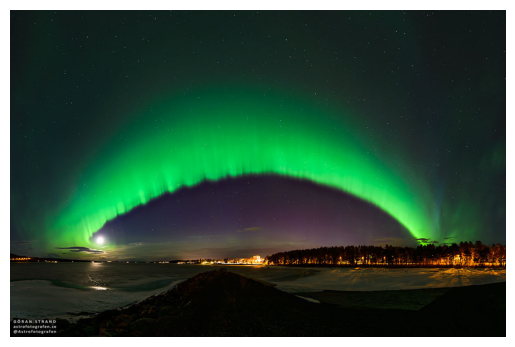

In [3]:
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt

# Pobranie daty od użytkownika
data = input("Podaj datę w formacie RRRR-MM-DD (np. 2024-05-31): ")

# URL do API NASA APOD
url = "https://api.nasa.gov/planetary/apod"
    
# Parametry żądania (bez klucza API)
params = {
    "date": data,
    "api_key": "DEMO_KEY"  # NASA APOD oferuje demo klucz "DEMO_KEY"
}
    
# Wysłanie żądania GET do API
response = requests.get(url, params=params)
    
# Sprawdzenie statusu odpowiedzi
if response.status_code == 200:
    # Parsowanie danych JSON
    data = response.json()
else:
    print(f"Błąd: Nie udało się pobrać danych (status code: {response.status_code})")

print(data)

# Wyświetlanie tytułu i opisu
print(f"Tytuł: {data['title']}")
print(f"Opis: {data['explanation']}")
    
# Pobieranie i wyświetlanie obrazu
response = requests.get(data['url'])
img = Image.open(BytesIO(response.content))
plt.imshow(img)
plt.axis('off')  # Ukryj osie
plt.show()